# Indicators of Heavy Traffic on I-94

In this project, we're going to analyze a dataset about the westbound traffic on the [I-94 Interstate highway](https://en.wikipedia.org/wiki/Interstate_94).

The goal of our analysis is to determine a few indicators of heavy traffic on I-94. These indicators can be weather type, time of the day, time of the week, etc.

## Here is a description of the columns in the dataset:

- `liday`:- US National holidays plus regional holidays
- `temp`:- Average temperature in kelvin
- `ain_1h`:- Amount in millimetres of rain that occurred in the hour
- `snow_1h`:- Amount in millimetres of snow that occurred in the hour
- `clouds_all`:- Percentage of cloud cover
- `weather_main`:- Short textual description of the current weather
- `weather_description`:- Longer textual description of the current weather
- `date_time`:- Time of data collection in local CST time
- `traffic_volume`:- Hourly I-94 ATR 301 reported westbound traffic volume
## The I-94 Traffic Dataset

John Hogue made the dataset available that we'll be working with, and you can download it from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/492/metro+interstate+traffic+volume).

In [1]:
import pandas as pd

i_94 = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')
i_94.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [2]:
i_94.tail()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,None,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


In [3]:
i_94.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


The dataset has 48,204 rows and 9 columns, and there are no null values. Each row describes traffic and weather data for a specific hour — we have data from 2012-10-02 09:00:00 until 2018-09-30 23:00:00.

A station located approximately midway between Minneapolis and Saint Paul records the traffic data (see the [dataset documentation](https://archive.ics.uci.edu/dataset/492/metro+interstate+traffic+volume). For this station, the direction of the route is westbound (i.e., cars moving from east to west). This means that the results of our analysis will be about the westbound traffic in the proximity of the station. In other words, we should avoid generalizing our results for the entire I-94 highway.

## Analyzing Traffic Volume

We're going to start our analysis by examining the distribution of the `traffic_volume`column.

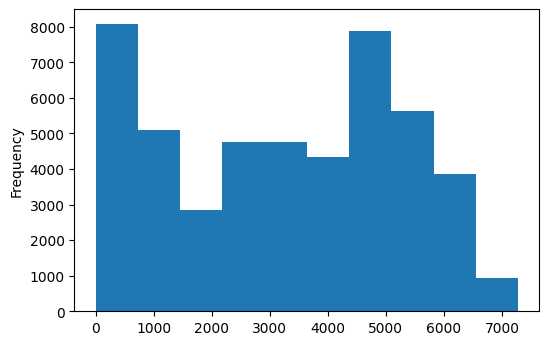

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
i_94['traffic_volume'].plot.hist()
plt.show()

In [5]:
i_94['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

Between 2012-10-02 09:00:00 and 2018-09-30 23:00:00, the hourly traffic volume varied from 0 to 7,280 cars, with an average of 3,260 cars.

About 25% of the time, there were only 1,193 cars or fewer passing the station each hour — this probably occurs during the night, or when a road is under construction. However, about 25% of the time, the traffic volume was four times as much (4,933 cars or more).

This observation gives our analysis an interesting direction: comparing daytime data with nighttime data.



## Traffic Volume: Day vs. Night

We'll start by dividing the dataset into two parts:

- Daytime data: hours from 7 a.m. to 7 p.m. (12 hours)
- Nighttime data: hours from 7 p.m. to 7 a.m. (12 hours)
While this is not a perfect criterion for distinguishing between nighttime and daytime, it's a good starting point.

In [6]:
i_94["date_time"] = pd.to_datetime(i_94["date_time"])

In [7]:
day = i_94.copy()[(i_94["date_time"].dt.hour >= 7) & (i_94["date_time"].dt.hour < 19)]
print(day.shape)

night = i_94.copy()[(i_94["date_time"].dt.hour >= 19) | (i_94["date_time"].dt.hour < 7)]
print(night.shape)

(23877, 9)
(24327, 9)


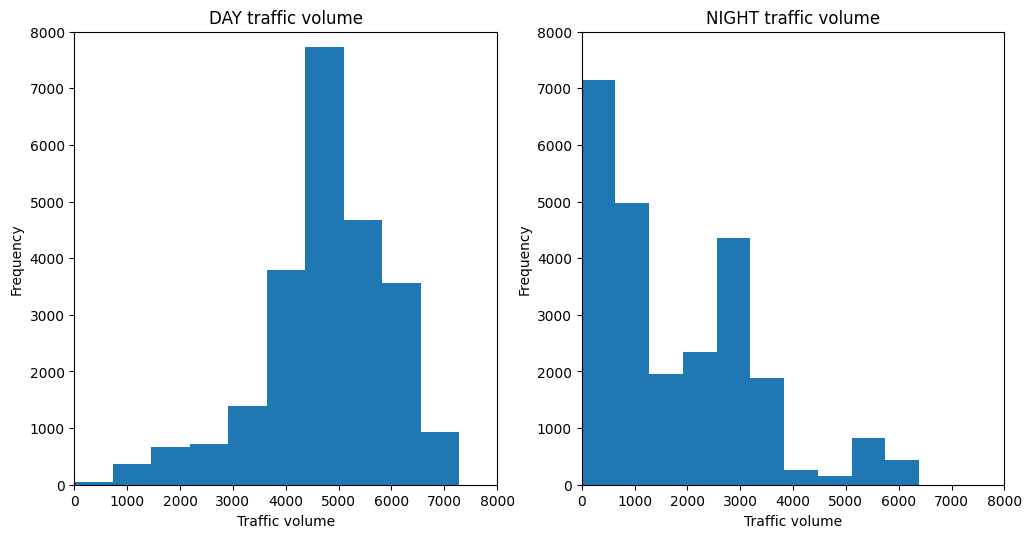

In [8]:
plt.figure(figsize = (12, 6))

plt.subplot(1, 2, 1)
plt.hist(day["traffic_volume"])
plt.title("DAY traffic volume")
plt.xlabel("Traffic volume")
plt.ylabel("Frequency")
plt.xlim(0, 8000)
plt.ylim(0, 8000)


plt.subplot(1, 2, 2)
plt.hist(night["traffic_volume"])
plt.title("NIGHT traffic volume")
plt.xlabel("Traffic volume")
plt.ylabel("Frequency")
plt.xlim(0, 8000)
plt.ylim(0, 8000)

plt.show()





In [9]:
day["traffic_volume"].describe()

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [10]:
night["traffic_volume"].describe()

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

As we can see traffic during a night with a average of 1785 is much lighter than during the day with an average of 4762. For this analysis, we are going to use only day time data.

One of the possible indicators of heavy traffic is time. There might be more people on the road in a certain month, on a certain day, or at a certain time of the day.

We're going to look at a few line plots showing how the traffic volume changed according to the following parameters:

- Month
- Day of the week
- Time of day

In [11]:
day["month"] = day["date_time"].dt.month
by_month = day.groupby("month")
by_month["traffic_volume"].mean()


month
1     4495.613727
2     4711.198394
3     4889.409560
4     4906.894305
5     4911.121609
6     4898.019566
7     4595.035744
8     4928.302035
9     4870.783145
10    4921.234922
11    4704.094319
12    4374.834566
Name: traffic_volume, dtype: float64

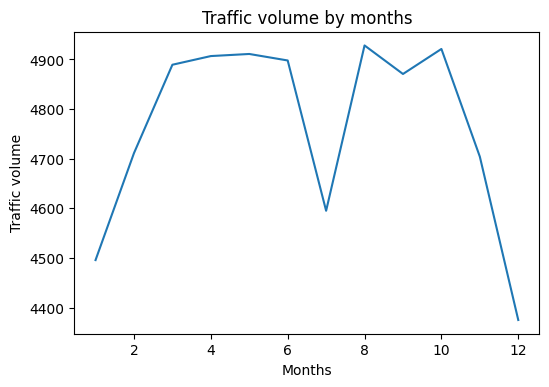

In [12]:
plt.plot(by_month["traffic_volume"].mean())
plt.xlabel("Months")
plt.ylabel("Traffic volume")
plt.title("Traffic volume by months")

plt.show()

It seems like traffic is very low around the new year probably due to hollidays and it also seems to be a bit lower in the middle of the summer, probably due to vacations.

In [13]:
day["day_of_week"] = day["date_time"].dt.dayofweek
by_day_of_week = day.groupby("day_of_week")
by_day_of_week["traffic_volume"].mean()

day_of_week
0    4893.551286
1    5189.004782
2    5284.454282
3    5311.303730
4    5291.600829
5    3927.249558
6    3436.541789
Name: traffic_volume, dtype: float64

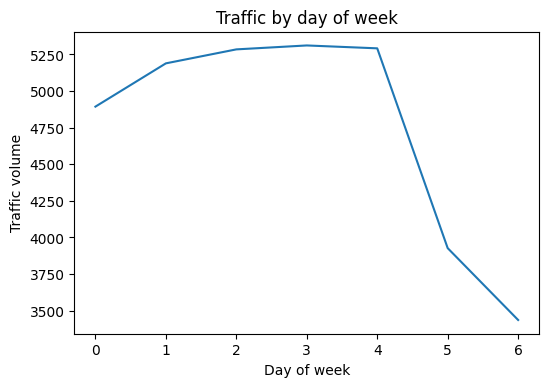

In [14]:
plt.plot(by_day_of_week["traffic_volume"].mean())
plt.title("Traffic by day of week")
plt.xlabel("Day of week")
plt.ylabel("Traffic volume")

plt.show()

During bussiness days there is much heavier traffic than during weekend. We'll now generate a line plot for the time of day. The weekends, however, will drag down the average values, so we're going to look at the averages separately. To do that, we'll start by splitting the data based on the day type: business day or weekend.

In [15]:
day["hour"] = day["date_time"].dt.hour
bussiness_days = day.copy()[day["day_of_week"] <= 4]
weekend = day.copy()[day["day_of_week"] >= 5]

bussiness_by_hour = bussiness_days.groupby("hour")
weekend_by_hour = weekend.groupby("hour")

print(bussiness_by_hour["traffic_volume"].mean())
print(weekend_by_hour["traffic_volume"].mean())

hour
7     6030.413559
8     5503.497970
9     4895.269257
10    4378.419118
11    4633.419470
12    4855.382143
13    4859.180473
14    5152.995778
15    5592.897768
16    6189.473647
17    5784.827133
18    4434.209431
Name: traffic_volume, dtype: float64
hour
7     1589.365894
8     2338.578073
9     3111.623917
10    3686.632302
11    4044.154955
12    4372.482883
13    4362.296564
14    4358.543796
15    4342.456881
16    4339.693805
17    4151.919929
18    3811.792279
Name: traffic_volume, dtype: float64


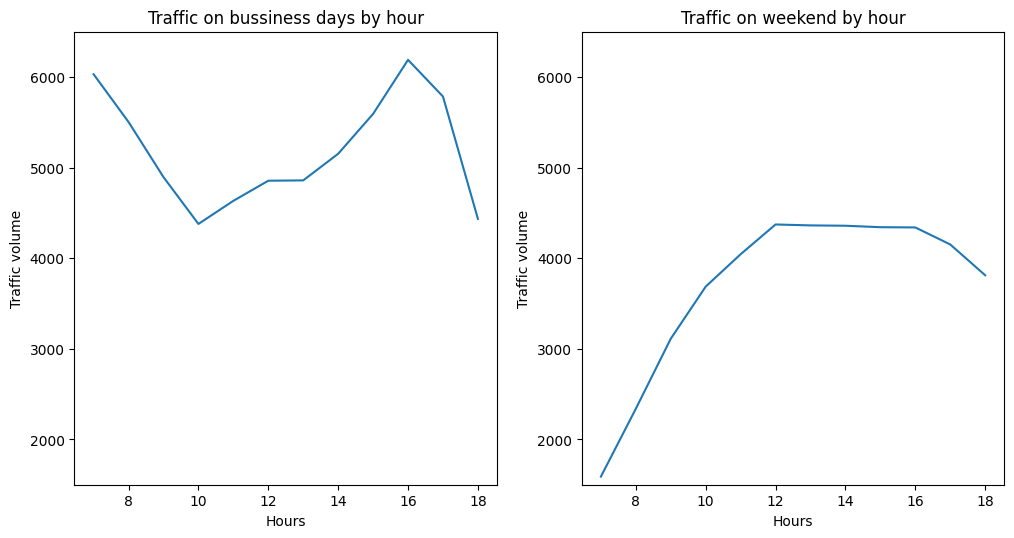

In [16]:
plt.figure(figsize = (12, 6))

plt.subplot(1, 2, 1)
plt.plot(bussiness_by_hour["traffic_volume"].mean())
plt.title("Traffic on bussiness days by hour")
plt.xlabel("Hours")
plt.ylabel("Traffic volume")
plt.ylim(1500, 6500)


plt.subplot(1, 2, 2)
plt.plot(weekend_by_hour["traffic_volume"].mean())
plt.title("Traffic on weekend by hour")
plt.xlabel("Hours")
plt.ylabel("Traffic volume")
plt.ylim(1500, 6500)

plt.show()

On bussiness days traffic is heavy, in the morning and again in the afternoon, whereas on weekend traffic is pretty low till noon and than it stays the same untill the evening, when it starts to drop off.

#### To summarize, we found a few time-related indicators of heavy traffic:

- The traffic is usually heavier during warm months (March–October) compared to cold months (November–February).
- The traffic is usually heavier on business days compared to weekends.
- On business days, the rush hours are around 7 and 16.


## Weather indicators

Another possible indicator of heavy traffic is weather. The dataset provides us with a few useful columns about weather: `temp, rain_1h, snow_1h, clouds_all, weather_main, weather_description.`

A few of these columns are numerical so let's start by looking up their correlation values with `traffic_volume.`

In [17]:
day.corr()["traffic_volume"]

temp              0.128317
rain_1h           0.003697
snow_1h           0.001265
clouds_all       -0.032932
traffic_volume    1.000000
month            -0.022337
day_of_week      -0.416453
hour              0.172704
Name: traffic_volume, dtype: float64

Temperature shows the strongest correlation with a value of just +0.13. The other relevant columns (`rain_1h, snow_1h, clouds_all`) don't show any strong correlation with traffic_value.

Let's generate a scatter plot to visualize the correlation between `temp` and `traffic_volume`.

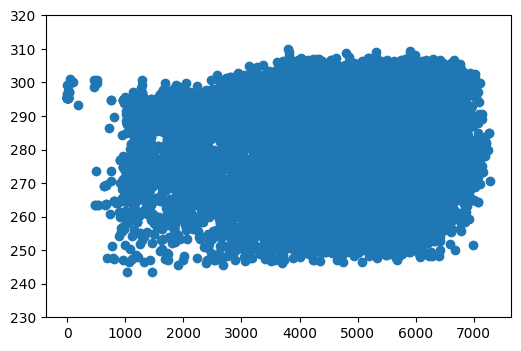

In [18]:
plt.scatter(day["traffic_volume"], day["temp"])
plt.ylim(230, 320)
plt.show()

We can conclude that temperature doesn't look like a solid indicator of heavy traffic.

Let's now look at the other weather-related columns: `weather_main` and `weather_description`.

## Weather types
To start, we're going to group the data by `weather_main` and look at the `traffic_volume` averages.


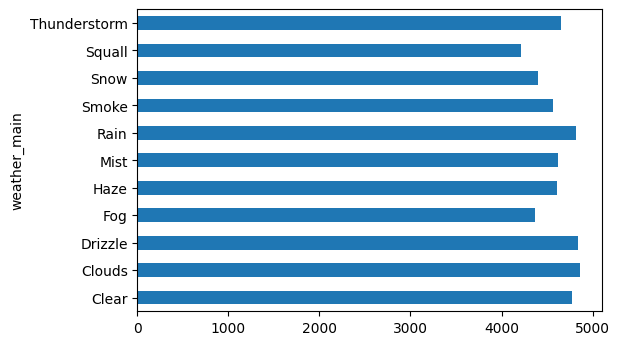

In [19]:
by_weather_main = day.groupby("weather_main")
by_weather_description = day.groupby("weather_description")

by_weather_main["traffic_volume"].mean().plot.barh()
plt.show()

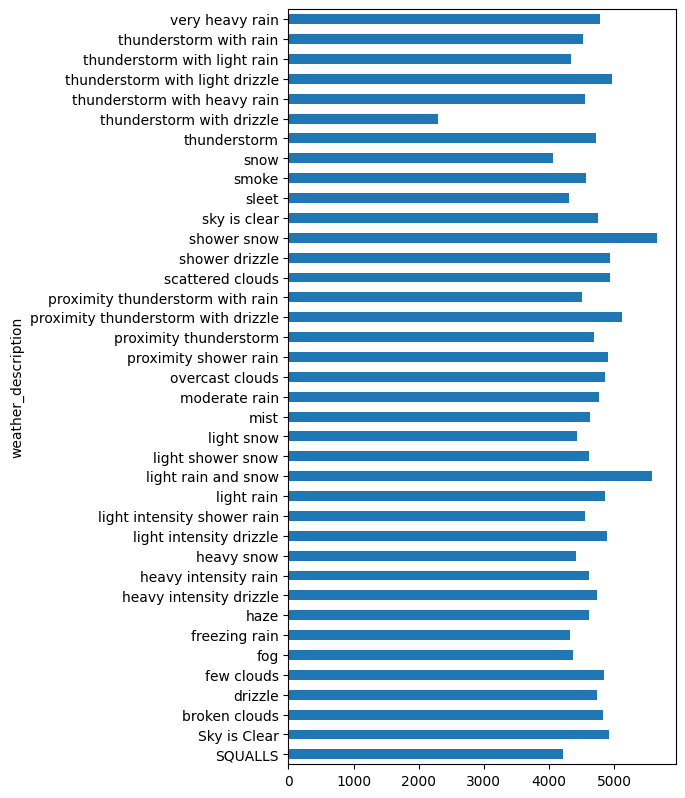

In [20]:
by_weather_description["traffic_volume"].mean().plot.barh(figsize = (5, 10))
plt.show()

It looks like there are three weather types where traffic volume exceeds 5,000:

- Shower snow
- Light rain and snow
- Proximity thunderstorm with drizzle

# Conclusion

In this project, we tried to find a few indicators of heavy traffic on the I-94 Interstate highway. We managed to find two types of indicators:

#### Time indicators
- The traffic is usually heavier during warm months (March–October) compared to cold months (November–February).
- The traffic is usually heavier on business days compared to the weekends.
- On business days, the rush hours are around 7 and 16.

#### Weather indicators
- Shower snow
- Light rain and snow
- Proximity thunderstorm with drizzle

### Some of the next step of this analysis might include:

- Use the nighttime data to look for heavy traffic indicators.
- Find more time and weather indicators.